In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [164]:
path = r"C:\Users\Arifin\Downloads\papaya\Combined_Leaf.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1.749893,3.062899,2.222365,3.068743,0.881938,0.789928,0.836790,0.792888,0.569768,0.518929,0.542852,0.520702,0.834022,0.709144,0.789176,0.708593,Fresh Papaya Leaf
1,1,0.973958,2.050565,1.597426,2.108881,0.973505,0.945987,0.952730,0.943764,0.755846,0.748174,0.751231,0.747684,0.982222,0.962667,0.970842,0.961605,Fresh Papaya Leaf
2,2,1.148805,2.764168,2.277512,2.787666,0.976294,0.945290,0.951699,0.944618,0.794646,0.785001,0.788239,0.785123,0.972863,0.934894,0.946200,0.934341,Fresh Papaya Leaf
3,3,0.663358,1.131642,0.800123,1.190235,0.984407,0.973292,0.979534,0.971856,0.652971,0.646309,0.650120,0.645156,0.979113,0.964460,0.974811,0.962620,Fresh Papaya Leaf
4,4,0.445312,0.772580,0.490074,0.743545,0.985087,0.972965,0.979264,0.972545,0.663605,0.655566,0.659423,0.655110,0.981232,0.967533,0.979352,0.968754,Fresh Papaya Leaf


In [165]:
df = df.rename(columns={'16': 'Class'})
features = df.drop('Class',axis=1)

In [166]:
df.info()
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  290 non-null    int64  
 1   0           290 non-null    float64
 2   1           290 non-null    float64
 3   2           290 non-null    float64
 4   3           290 non-null    float64
 5   4           290 non-null    float64
 6   5           290 non-null    float64
 7   6           290 non-null    float64
 8   7           290 non-null    float64
 9   8           290 non-null    float64
 10  9           290 non-null    float64
 11  10          290 non-null    float64
 12  11          290 non-null    float64
 13  12          290 non-null    float64
 14  13          290 non-null    float64
 15  14          290 non-null    float64
 16  15          290 non-null    float64
 17  Class       290 non-null    object 
dtypes: float64(16), int64(1), object(1)
memory usage: 40.9+ KB


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1.749893,3.062899,2.222365,3.068743,0.881938,0.789928,0.836790,0.792888,0.569768,0.518929,0.542852,0.520702,0.834022,0.709144,0.789176,0.708593
1,1,0.973958,2.050565,1.597426,2.108881,0.973505,0.945987,0.952730,0.943764,0.755846,0.748174,0.751231,0.747684,0.982222,0.962667,0.970842,0.961605
2,2,1.148805,2.764168,2.277512,2.787666,0.976294,0.945290,0.951699,0.944618,0.794646,0.785001,0.788239,0.785123,0.972863,0.934894,0.946200,0.934341
3,3,0.663358,1.131642,0.800123,1.190235,0.984407,0.973292,0.979534,0.971856,0.652971,0.646309,0.650120,0.645156,0.979113,0.964460,0.974811,0.962620
4,4,0.445312,0.772580,0.490074,0.743545,0.985087,0.972965,0.979264,0.972545,0.663605,0.655566,0.659423,0.655110,0.981232,0.967533,0.979352,0.968754


In [167]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
  
scaler = MinMaxScaler()
  
scaler.fit(features)
features = scaler.transform(features)
  
df_feat = pd.DataFrame(features, columns = df.columns[:-1])
df_feat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,0.148144,0.239744,0.216603,0.248402,0.767594,0.636136,0.530312,0.645433,0.376727,0.311422,0.346022,0.320881,0.551579,0.428397,0.455723,0.448025
1,0.013889,0.066266,0.143334,0.146011,0.154145,0.971810,0.944258,0.899866,0.939523,0.846816,0.854810,0.850998,0.855453,0.986103,0.966909,0.950728,0.960621
2,0.027778,0.084716,0.211294,0.222832,0.220801,0.978030,0.942883,0.896578,0.941186,0.944834,0.942104,0.940682,0.943626,0.958660,0.907916,0.883582,0.905384
3,0.041667,0.033491,0.055819,0.055950,0.063936,0.996125,0.998169,0.985303,0.994278,0.586923,0.613356,0.605972,0.613984,0.976987,0.970717,0.961541,0.962677
4,0.055556,0.010483,0.021623,0.020927,0.020072,0.997641,0.997523,0.984442,0.995622,0.613788,0.635298,0.628515,0.637428,0.983201,0.977245,0.973914,0.975105


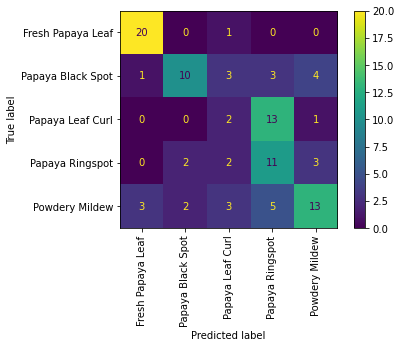

In [168]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
      features, df['Class'], test_size = 0.35, random_state=None)
  
# Remember that we are trying to come up
# with a model to predict whether
# someone will TARGET CLASS or not.
# We'll start with k = 1.

from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier(n_neighbors = 1)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

plot_confusion_matrix(knn, X_test, y_test)
plt.xticks(rotation = 90)
plt.show()

# Predictions and Evaluations
# Let's evaluate our KNN model ! 


In [169]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))


                   precision    recall  f1-score   support

Fresh Papaya Leaf       0.83      0.95      0.89        21
Papaya Black Spot       0.71      0.48      0.57        21
 Papaya Leaf Curl       0.18      0.12      0.15        16
  Papaya Ringspot       0.34      0.61      0.44        18
   Powdery Mildew       0.62      0.50      0.55        26

         accuracy                           0.55       102
        macro avg       0.54      0.53      0.52       102
     weighted avg       0.57      0.55      0.54       102



In [170]:
from sklearn import metrics
error_rate = []
scores = []

k=30
max_accuracy=0
best_k=1

for i in range(1, k):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    y_predict = knn.predict(X_test)
    curr_accuracy=metrics.accuracy_score(y_test,y_predict)
    if curr_accuracy>max_accuracy:
        max_accuracy=curr_accuracy
        best_k=i
    scores.append(curr_accuracy)
  


Text(0, 0.5, 'Error Rate')

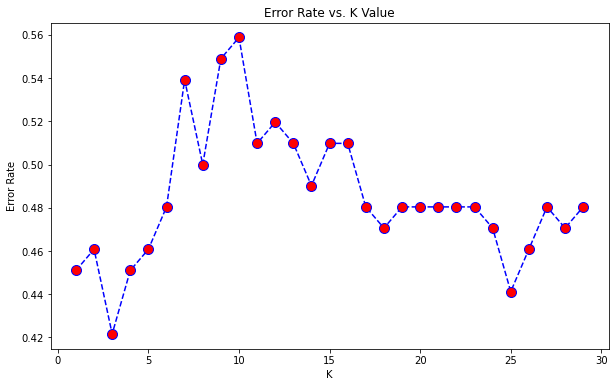

In [171]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, k), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

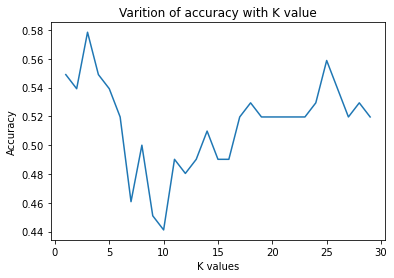

In [172]:
plt.plot(np.arange(1,k),scores)
plt.title('Varition of accuracy with K value')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [173]:
knn = KNeighborsClassifier(n_neighbors = best_k)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))

print("Accuracy for k = {} is {}%".format(best_k,max_accuracy*100))

                   precision    recall  f1-score   support

Fresh Papaya Leaf       0.83      0.95      0.89        21
Papaya Black Spot       0.60      0.43      0.50        21
 Papaya Leaf Curl       0.67      0.38      0.48        16
  Papaya Ringspot       0.34      0.61      0.44        18
   Powdery Mildew       0.59      0.50      0.54        26

         accuracy                           0.58       102
        macro avg       0.61      0.57      0.57       102
     weighted avg       0.61      0.58      0.58       102

Accuracy for k = 3 is 57.84313725490197%


In [174]:
from sklearn.svm import SVC
svm_model= SVC()
tuned_parameters = {
 'C': (np.arange(1,30)) , 'kernel': ['linear'],
 'C': (np.arange(1,30)) ,  'kernel': ['rbf'],
 'C':(np.arange(1,30)) , 'kernel':['poly']
                   }
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
X_train, X_test, y_train, y_test = train_test_split(features, df['Class'], test_size = 0.2, random_state=None)
model_svm.fit(X_train,y_train)
print('best hyperlink parameters')
print(model_svm.best_params_)
y_pred= model_svm.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_pred,y_test)*100 , "%")


best hyperlink parameters
{'C': 8, 'kernel': 'poly'}
Accuracy Score:
81.03448275862068 %
